In [ ]:
#install
!pip install country_converter



In [2]:
# data
import pandas as pd
import numpy as np
import country_converter as coco

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

# nltk
import nltk

# styling
%matplotlib inline
sns.set_theme(style="whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('fivethirtyeight')

<ipython-input-2-c7c654039dbc>:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


#1.Data loading and get information



In [16]:
import pandas as pd
df = pd.read_csv('salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
df.describe(exclude= np.number)

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


df.describe()

In [18]:
df.drop(df[['salary','salary_currency','Unnamed: 0']],axis=1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


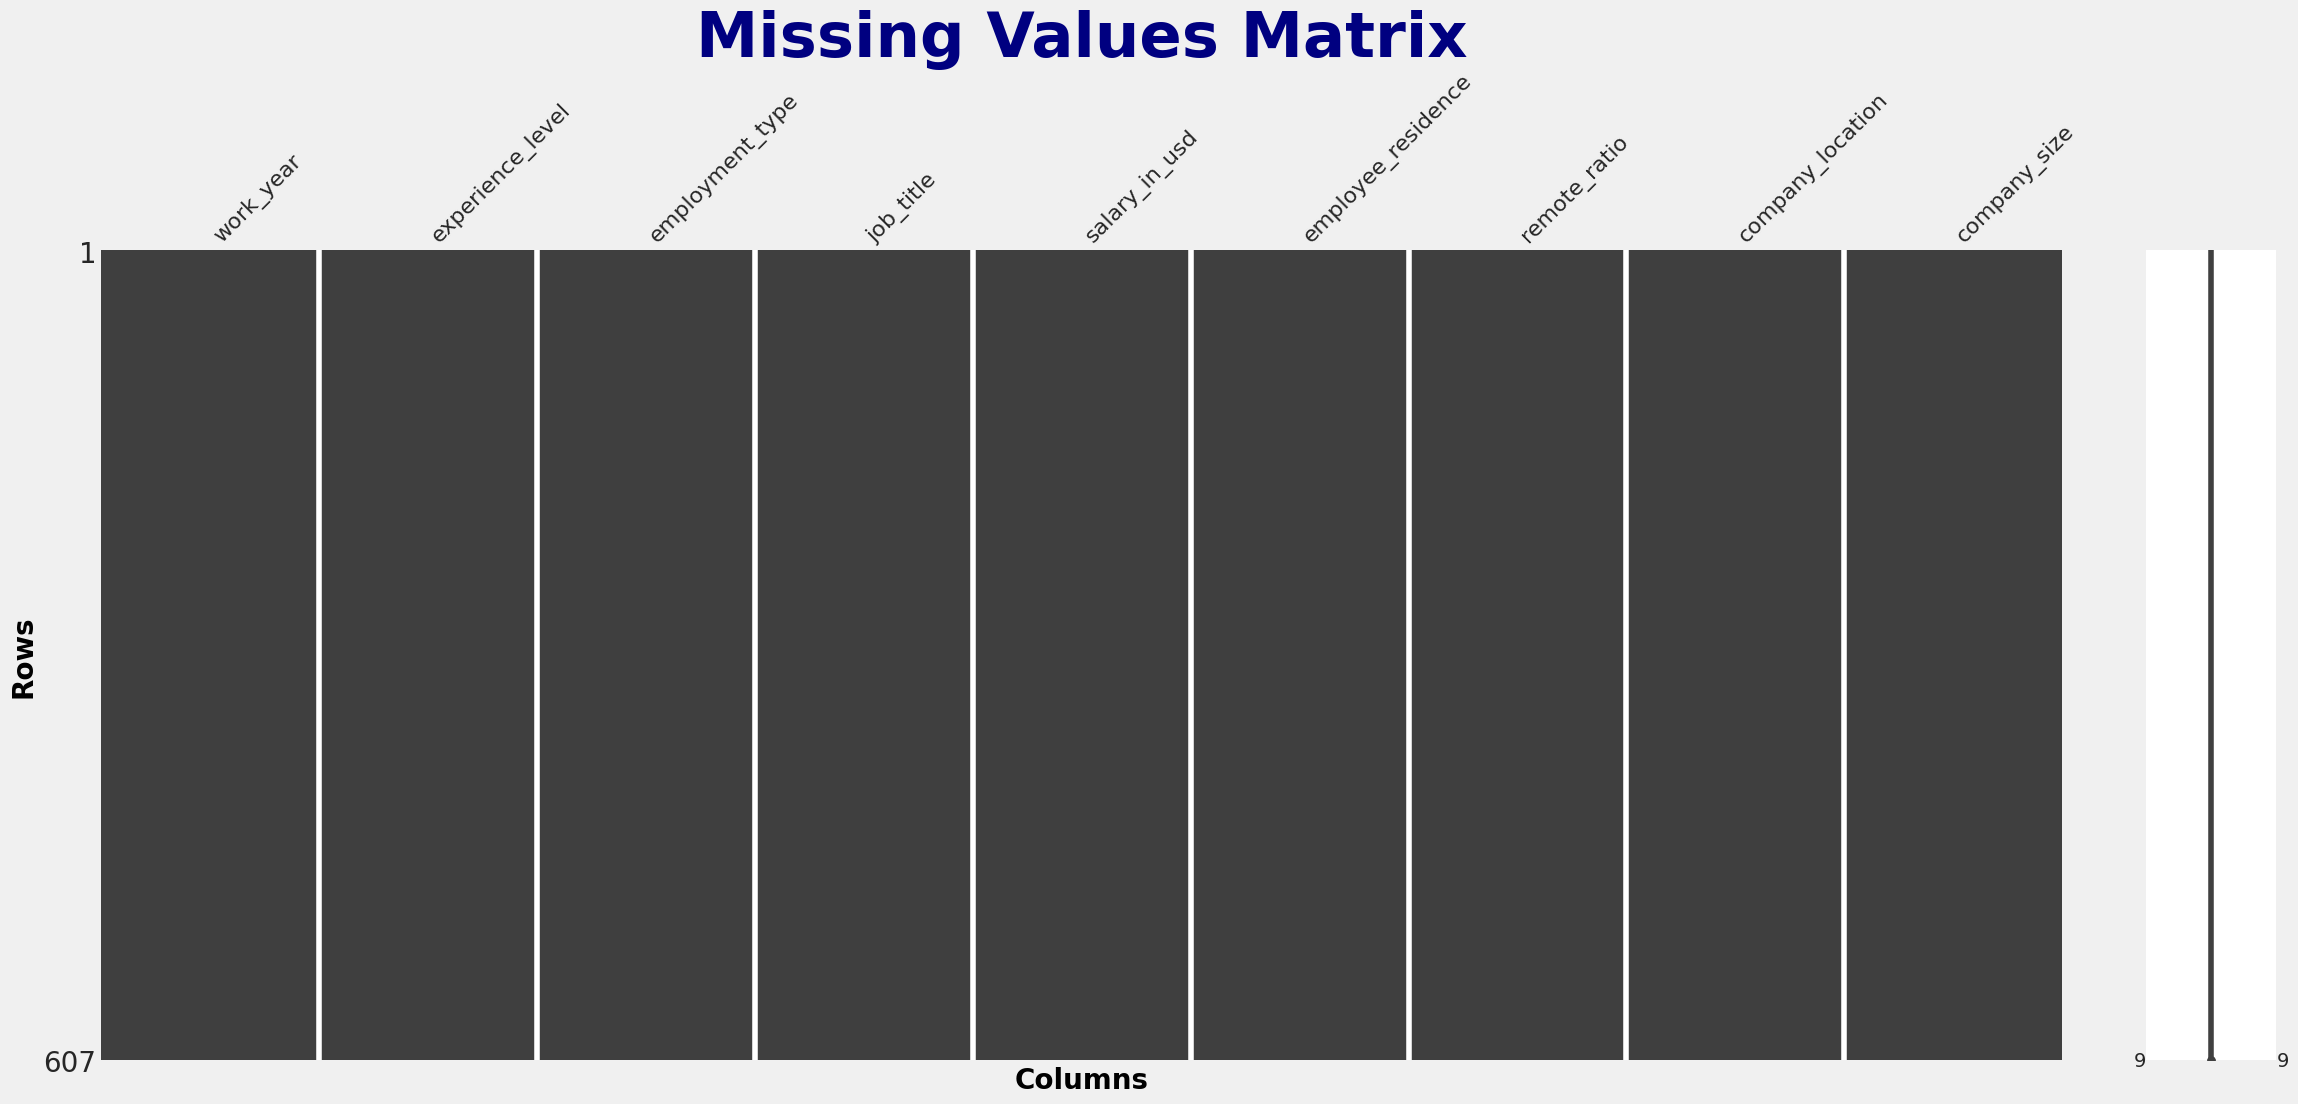

In [77]:
msno.matrix(df)
plt.title('Missing Values Matrix', fontsize=45, fontweight='bold', color='navy')
plt.xlabel('Columns', fontsize=20, fontweight='bold', color='black')
plt.ylabel('Rows', fontsize=20, fontweight='bold', color='black')
plt.show()


In [21]:
def get_numerical_columns(dataframe):

    numerical_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    return numerical_columns
numerical_columns_list = get_numerical_columns(df)
numerical_columns_count = len(numerical_columns_list)
print("Numerical Columns:", numerical_columns_list)
print("Number of Numerical Columns:", numerical_columns_count)

def get_categorical_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns.tolist()
    return categorical_columns
categorical_columns_list = get_categorical_columns(df)
categorical_columns_count = len(categorical_columns_list)

print("Categorical Columns:", categorical_columns_list)
print("Number of Categorical Columns:", categorical_columns_count)


Numerical Columns: ['work_year', 'salary_in_usd', 'remote_ratio']
Number of Numerical Columns: 3
Categorical Columns: ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
Number of Categorical Columns: 6


#2.Categorical Columns
#2.1 Experience level

In [23]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [25]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

In [26]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level/Intermediate,FT,Data Scientist,79833,DE,0,DE,L
1,2020,Senior-level/Expert,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,Senior-level/Expert,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,Mid-level/Intermediate,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,Senior-level/Expert,FT,Machine Learning Engineer,150000,US,50,US,L


In [75]:
ex_level = df['experience_level'].value_counts()
custom_colors =  ['#dc8127', '#c78646','#15456a','#3a7aab']
fig = px.treemap(ex_level,
                 path=[ex_level.index],
                 values=ex_level.values,
                 title = 'Experience Level',
                 color=ex_level.index,
                 color_discrete_sequence=custom_colors,
                 template='plotly_dark',
                 width=1000, height=500)

percents = np.round((100*ex_level.values / sum(ex_level.values)).tolist(),2)
fig.data[0].customdata = [35.09, 46.13, 4.28 , 14.5]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

fig.update_layout(
    font=dict(size=19,family="Arial"),title_font=dict(color='navy'), paper_bgcolor='lightgrey')

fig.show()

In [28]:
ex_level

Senior-level/Expert         280
Mid-level/Intermediate      213
Entry-level/Junior           88
Executive-level/Director     26
Name: experience_level, dtype: int64

In [29]:
print('how many job titles in the dataset: ',df['job_title'].value_counts().size)

how many job titles in the dataset:  50


#2.2 Job title

In [74]:
top10_job_title = df['job_title'].value_counts()[:10]
custom_color_sequence = ['#dc8127', '#c78646','#15456a','#3a7aab']

fig = px.bar(y=top10_job_title.values,
             x=top10_job_title.index,
             color = top10_job_title.index,
             color_discrete_sequence=custom_color_sequence,
             text=top10_job_title.values,
             title= 'Top 10 Job',
             template= 'plotly')
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="count",
    xaxis_title_font=dict(color='black'),  # Cambiar color del título del eje x a negro
    yaxis_title_font=dict(color='black'),
    font = dict(size=17,family="Arial"),title_font=dict(color='navy'), paper_bgcolor='lightgrey',
    legend_title_text=' ',
    xaxis=dict(tickfont=dict(color='black')),  # Cambiar el color de los índices en el eje x
    yaxis=dict(tickfont=dict(color='black')))
fig.update_traces(textfont=dict(color='black'),outsidetextfont=dict(color='black'))
fig.show()

In [31]:
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=1200,
               height=600,
               max_words=50,
               colormap= colormap,
               max_font_size = 100,
               random_state=88,
               background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

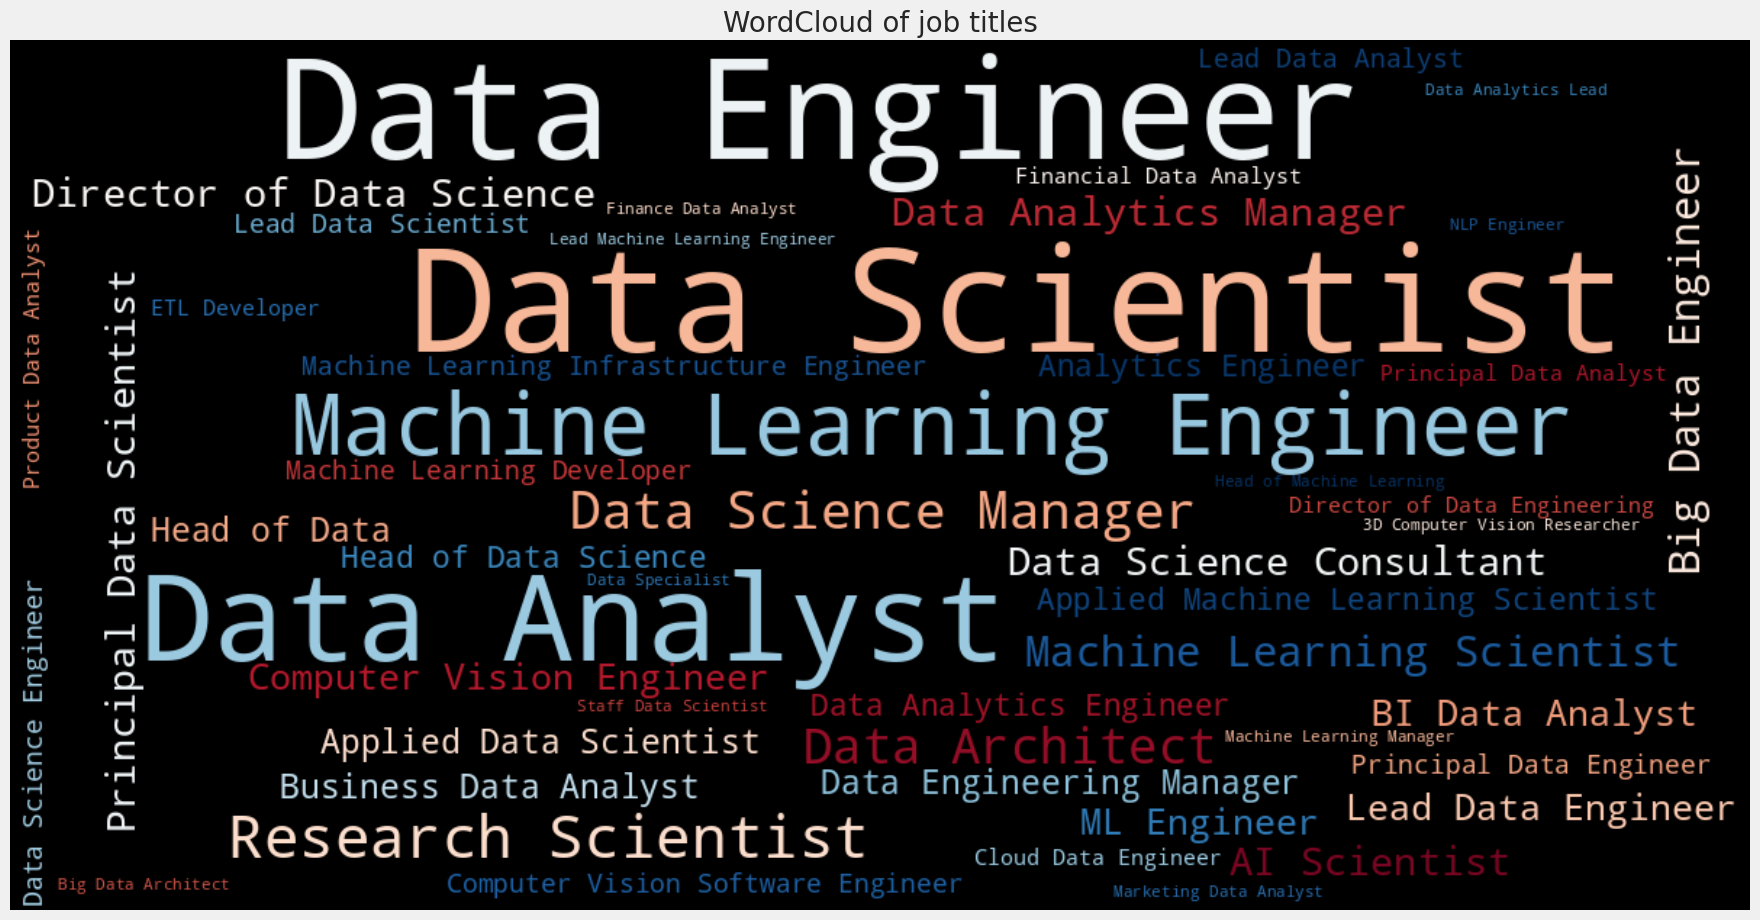

In [32]:
freq_df = Freq_df(df['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black','RdBu', 'WordCloud of job titles')

#2.3 Employment Types

In [34]:
print('Employment types: ',df['employment_type'].unique())

Employment types:  ['FT' 'CT' 'PT' 'FL']


In [67]:
type_grouped = df['employment_type'].value_counts()
custom_color_sequence = ['#dc8127', '#c78646','#15456a','#3a7aab']
e_type = ['Full-Time','Part-Time','Contract','Freelance']
fig = px.bar(x = e_type, y = type_grouped.values,
       color = type_grouped.index,
       color_discrete_sequence=custom_color_sequence,
       template = 'plotly',
       text = type_grouped.values, title = 'Employment Type Distribution')
fig.update_layout(
    xaxis_title="Employment Type",
    yaxis_title="count",
    xaxis_title_font=dict(color='black'),  # Cambiar color del título del eje x a negro
    yaxis_title_font=dict(color='black'),
    font = dict(size=17,family="Arial"),title_font=dict(color='navy'), paper_bgcolor='lightgrey',
    legend_title_text=' ',
    xaxis=dict(tickfont=dict(color='black')),  # Cambiar el color de los índices en el eje x
    yaxis=dict(tickfont=dict(color='black')))
fig.update_traces(textfont=dict(color='black'),outsidetextfont=dict(color='black'))


fig.show()

#2.4 Employee residence

In [36]:
converted_country = coco.convert(names=df['employee_residence'], to="ISO3")
df['employee_residence'] = converted_country

In [69]:
residence = df['employee_residence'].value_counts()
custom_color_sequence = ['#dc8127', '#15456a']
fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=custom_color_sequence,
                    template='plotly',
                    title = 'Employee Location Map')

fig.update_layout(font = dict(size= 17, family="Ariel"),
                  title_font=dict(color='navy'),
                  paper_bgcolor='lightgrey')
fig.show()

#2.5 Company location

In [71]:
top10_employee_location = residence[:10]
custom_color_sequence = ['#dc8127', '#c78646','#15456a','#3a7aab']
fig = px.bar(y=top10_employee_location.values,
             x=top10_employee_location.index,
             color = top10_employee_location.index,
             color_discrete_sequence=custom_color_sequence,
             text=top10_employee_location.values,
             title= 'Top 10 Location of Employee',
             template= 'plotly')
fig.update_layout(
    xaxis_title="Location of Employee",
    yaxis_title="count",
    xaxis_title_font=dict(color='black'),
    yaxis_title_font=dict(color='black'),
    xaxis=dict(tickfont=dict(color='black')),
    yaxis=dict(tickfont=dict(color='black')),
    font = dict(size=17,family="Arial"),
    title_font=dict(color='navy'),
    paper_bgcolor='lightgrey')
fig.update_traces(textfont=dict(color='black'),outsidetextfont=dict(color='black'))

fig.show()

In [100]:
converted_country = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = converted_country
c_location = df['company_location'].value_counts()
top_10_company_location = c_location[:10]
fig = go.Figure(data=[
    go.Bar(name='Employee Loaction',
           x=top10_employee_location.index, y=top10_employee_location.values,
           text=top10_employee_location.values,marker_color='#dc8127'),
    go.Bar(name='Company Location', x=top_10_company_location.index,
           y=top_10_company_location.values,text=top_10_company_location.values,marker_color='#15456a')
])
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Comparison of Employee Location and Company Location',
                  template='plotly',
                  font = dict(size=17,family="Ariel"),
                  xaxis_title_font=dict(color='black'),
                  yaxis_title_font=dict(color='black'),
                  xaxis=dict(tickfont=dict(color='black')),
                  yaxis=dict(tickfont=dict(color='black')),
                  title_font=dict(color='navy'),
                  paper_bgcolor='lightgrey')

fig.show()

#2.6 Company size

In [101]:
grouped_size = df['company_size'].value_counts()
custom_color_sequence = ['#dc8127', '#c78646','#15456a','#3a7aab']
fig = px.bar(y=grouped_size.values,
             x=grouped_size.index,
             color = grouped_size.index,
             color_discrete_sequence=custom_color_sequence,
             text=grouped_size.values,
             title= 'Distribution of Company Size',
             template= 'plotly')

fig.update_traces(width=0.4)
fig.update_layout(
    xaxis_title="Company Size",
    yaxis_title="count",
    font = dict(size=17,family="Ariel"),
    xaxis_title_font=dict(color='black'),
    yaxis_title_font=dict(color='black'),
    xaxis=dict(tickfont=dict(color='black')),
    yaxis=dict(tickfont=dict(color='black')),
    title_font=dict(color='navy'),
    paper_bgcolor='lightgrey')
fig.update_traces(textfont=dict(color='black'),outsidetextfont=dict(color='black'))

fig.show()

#3.NUmerical Columns

#3.1 work year

In [102]:
wkyear = df['work_year'].value_counts()
custom_color_sequence = ['#dc8127','#15456a','#3a7aab']
fig = px.pie(values=wkyear.values,
             names=wkyear.index,
             color_discrete_sequence=custom_color_sequence,
             title= 'Work year distribution',template='plotly')
fig.update_traces(textinfo='label+percent+value', textfont_size=18,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.update_layout(
    font = dict(size=17,family="Ariel"),
    xaxis_title_font=dict(color='black'),
    yaxis_title_font=dict(color='black'),
    xaxis=dict(tickfont=dict(color='black')),
    yaxis=dict(tickfont=dict(color='black')),
    title_font=dict(color='navy'),
    paper_bgcolor='lightgrey'
    )
fig.update_traces(textfont=dict(color='black'),outsidetextfont=dict(color='black'))

fig.show()

#3.2 Salary in USD

In [93]:
hist_data = [df['salary_in_usd']]
group_labels = ['salary_in_usd']
fig1 = px.box(y=df['salary_in_usd'],template= 'plotly', title = 'Salary in USD (BoxPlot)')
fig2 = ff.create_distplot(hist_data, group_labels, show_hist=False)
fig2.layout.template = 'plotly'
fig1.update_layout(font = dict(size=17,family="Ariel"),
                   xaxis_title_font=dict(color='black'),
                   yaxis_title_font=dict(color='black'),
                   xaxis=dict(tickfont=dict(color='black')),
                   yaxis=dict(tickfont=dict(color='black')),
                   title_font=dict(color='navy'),
                   paper_bgcolor='lightgrey'
                   )
fig2.update_layout(title='Salary in USD(DistPlot)',
                   font = dict(size=17,family="Ariel"),
                   xaxis_title_font=dict(color='black'),
                   yaxis_title_font=dict(color='black'),
                   xaxis=dict(tickfont=dict(color='black')),
                   yaxis=dict(tickfont=dict(color='black')),
                   title_font=dict(color='navy'),
                   paper_bgcolor='lightgrey')
fig1.show()
fig2.show()

#3.3 Remote ratio

In [103]:
remote_type = ['Fully Remote','Partially Remote','No Remote Work']
custom_color_sequence = ['#dc8127','#15456a','#3a7aab']
plt.figure(figsize=(20,5))
fig = px.bar(x = ['Fully Remote','No Remote Work','Partially Remote'],
       y = df['remote_ratio'].value_counts().values,
       color = remote_type,
       color_discrete_sequence=custom_color_sequence,
       text=df['remote_ratio'].value_counts().values,
       title = 'Remote Ratio Distribution',
       template='plotly')

fig.update_traces(width=0.4)

fig.data[0].marker.line.width = 2


fig.update_layout(
    xaxis_title="Remote Type",
    yaxis_title="count",
    font = dict(size=17,family="Ariel"),
                   xaxis_title_font=dict(color='black'),
                   yaxis_title_font=dict(color='black'),
                   xaxis=dict(tickfont=dict(color='black')),
                   yaxis=dict(tickfont=dict(color='black')),
                   title_font=dict(color='navy'),
                   paper_bgcolor='lightgrey')
fig.update_traces(textfont=dict(color='black'),outsidetextfont=dict(color='black'))

fig.show()

<Figure size 2000x500 with 0 Axes>

#4.Remote ratio by year work

In [105]:
remote_year = df.groupby(['work_year','remote_ratio']).size()
ratio_2020 = np.round(remote_year[2020].values/remote_year[2020].values.sum(),2)
ratio_2021 = np.round(remote_year[2021].values/remote_year[2021].values.sum(),2)
ratio_2022 = np.round(remote_year[2022].values/remote_year[2022].values.sum(),2)
fig = go.Figure()
categories = ['No Remote Work', 'Partially Remote', 'Fully Remote']
fig.add_trace(go.Scatterpolar(
             r = ratio_2020,
             theta = categories,
             fill = 'toself',
             name = '2020 remote ratio'
             ))
fig.add_trace(go.Scatterpolar(
             r = ratio_2021,
             theta = categories,
             fill = 'toself',
             name = '2021 remote ratio'
#              fillcolor = 'lightred'
             ))
fig.add_trace(go.Scatterpolar(
             r = ratio_2022,
             theta = categories,
             fill = 'toself',
             name = '2022 remote ratio'
#              fillcolor = 'lightblue'
             ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
#       visible=True,
      range=[0, 0.75]
    )),
  font = dict(size=17,family="Ariel"),
                   xaxis_title_font=dict(color='black'),
                   yaxis_title_font=dict(color='black'),
                   xaxis=dict(tickfont=dict(color='black')),
                   yaxis=dict(tickfont=dict(color='black')),
                   title_font=dict(color='navy'),
                   paper_bgcolor='lightgrey',
  showlegend=True,
  title = 'Remote Ratio by Work Year'
)
fig.layout.template = 'plotly'

fig.show()

#5.Experience level anaylis

#5.1 Employment type by experience level

In [106]:
exlevel_type = df.groupby(['experience_level','employment_type']).size()
custom_color_sequence = ['#dc8127', '#c78646','#15456a','#3a7aab']

fig = go.Figure(data=[
    go.Bar(name='Entry-level/Junior', x=exlevel_type['Entry-level/Junior'].index, y=exlevel_type['Entry-level/Junior'].values,
           text=exlevel_type['Entry-level/Junior'].values, marker_color='#dc8127'),
    go.Bar(name='Executive-level/Director', x=exlevel_type['Executive-level/Director'].index, y=exlevel_type['Executive-level/Director'].values,
           text=exlevel_type['Executive-level/Director'].values, marker_color='#c78646'),
    go.Bar(name='Mid-level/Intermediate', x=exlevel_type['Mid-level/Intermediate'].index, y=exlevel_type['Mid-level/Intermediate'].values,
           text=exlevel_type['Mid-level/Intermediate'].values, marker_color='#15456a'),
    go.Bar(name='Senior-level/Expert', x=exlevel_type['Senior-level/Expert'].index, y=exlevel_type['Senior-level/Expert'].values,
           text=exlevel_type['Senior-level/Expert'].values, marker_color='#3a7aab'),
])
fig.update_layout(xaxis_tickangle=-45, title='Experiece Level with Employment Type',
                  font = dict(size=17,family="Ariel"),
                   xaxis_title_font=dict(color='black'),
                   yaxis_title_font=dict(color='black'),
                   xaxis=dict(tickfont=dict(color='black')),
                   yaxis=dict(tickfont=dict(color='black')),
                   title_font=dict(color='navy'),
                   paper_bgcolor='lightgrey', template='plotly')
fig.update_traces(textfont=dict(color='black'),outsidetextfont=dict(color='black'))

fig.show()

#5.2 The top 3 job by experience level

In [109]:
exlevel_job = df.groupby(['experience_level','job_title']).size()

entry_top3 = exlevel_job['Entry-level/Junior'].sort_values(ascending=False)[:3]
executive_top3 = exlevel_job['Executive-level/Director'].sort_values(ascending=False)[:3]
mid_top3 = exlevel_job['Mid-level/Intermediate'].sort_values(ascending=False)[:3]
senior_top3 = exlevel_job['Senior-level/Expert'].sort_values(ascending=False)[:3]

exlevel_type = df.groupby(['experience_level','employment_type']).size()
fig = go.Figure(data=[
    go.Bar(name='Entry-level/Junior', x=entry_top3.index, y=entry_top3.values,
           text=entry_top3.values, marker_color='#dc8127'),
    go.Bar(name='Executive-level/Director', x=executive_top3.index, y=executive_top3.values,
           text=executive_top3.values, marker_color='#c78646'),
    go.Bar(name='Mid-level/Intermediate', x=mid_top3.index, y=mid_top3.values,
           text=mid_top3.values, marker_color='#15456a'),
    go.Bar(name='Senior-level/Expert', x=senior_top3.index, y=senior_top3.values,
           text=senior_top3.values, marker_color='#3a7aab'),
])
fig.update_layout(barmode = 'stack', xaxis_tickangle=-45, title='Experiece Level with top 3 job title',
                  font = dict(family="Ariel", size=17),
                  template='plotly',
                  xaxis_title_font=dict(color='black'),
                   yaxis_title_font=dict(color='black'),
                   xaxis=dict(tickfont=dict(color='black')),
                   yaxis=dict(tickfont=dict(color='black')),
                   title_font=dict(color='navy'),
                   paper_bgcolor='lightgrey')
fig.update_traces(textfont=dict(color='black'),outsidetextfont=dict(color='black'))

fig.show()


#5.3 Company size by experience level

In [115]:
exlevel_size = df.groupby(['experience_level','company_size']).size()
custom_color_sequence = ['#dc8127', '#c78646','#15456a','#3a7aab']

fig = go.Figure(data=[
    go.Bar(name='Entry-level/Junior', x=exlevel_size['Entry-level/Junior'].index, y=exlevel_size['Entry-level/Junior'].values,
           text=exlevel_size['Entry-level/Junior'].values, marker_color='#dc8127'),
    go.Bar(name='Executive-level/Director', x=exlevel_size['Executive-level/Director'].index, y=exlevel_size['Executive-level/Director'].values,
           text=exlevel_size['Executive-level/Director'].values, marker_color='#c78646'),
    go.Bar(name='Mid-level/Intermediate', x=exlevel_size['Mid-level/Intermediate'].index, y=exlevel_size['Mid-level/Intermediate'].values,
           text=exlevel_size['Mid-level/Intermediate'].values, marker_color='#15456a'),
    go.Bar(name='Senior-level/Expert', x=exlevel_size['Senior-level/Expert'].index, y=exlevel_size['Senior-level/Expert'].values,
           text=exlevel_size['Senior-level/Expert'].values, marker_color='#3a7aab'),
])
fig.update_layout(xaxis_tickangle=-45, title='Experience Level with Company Size',
                  font=dict(family="Ariel", size=17),
                  template='plotly',
                  xaxis_title_font=dict(color='black'),
                   yaxis_title_font=dict(color='black'),
                   xaxis=dict(tickfont=dict(color='black')),
                   yaxis=dict(tickfont=dict(color='black')),
                   title_font=dict(color='navy'),
                   paper_bgcolor='lightgrey')

fig.update_traces(textfont=dict(color='black'),outsidetextfont=dict(color='black'))

fig.show()

# 6 Company location analysis

#6.1 Experience level


In [116]:
exlevel_location = df.groupby(['experience_level','company_location']).size()
custom_color_sequence = ['#dc8127', '#15456a']

entry_location = exlevel_location['Entry-level/Junior']
executive_location = exlevel_location['Executive-level/Director']
mid_location = exlevel_location['Mid-level/Intermediate']
senior_location = exlevel_location['Senior-level/Expert']

fig1 = px.choropleth(locations=entry_location.index,
                    color=entry_location.values,
                    color_continuous_scale=custom_color_sequence,
                    template='plotly',
                    title = 'Entry-level/Junior Company Location')

fig2 = px.choropleth(locations=mid_location.index,
                    color=mid_location.values,
                    color_continuous_scale=custom_color_sequence,
                    template='plotly',
                    title = 'Mid-level/Intermediate Company Location')
fig3 = px.choropleth(locations=senior_location.index,
                    color=senior_location.values,
                    color_continuous_scale=custom_color_sequence,
                    template='plotly',
                    title = 'Senior-level/Expert Company Location')
fig4 = px.choropleth(locations=executive_location.index,
                    color=executive_location.values,
                    color_continuous_scale=custom_color_sequence,
                    template='plotly',
                    title = 'Executive-level/Director Company Location')

fig1.add_scattergeo(
    locations=entry_location.index,
    text= entry_location.values,
    mode='text')

fig2.add_scattergeo(
    locations=mid_location.index,
    text= mid_location.values,
    mode='text')

fig3.add_scattergeo(
    locations=senior_location.index,
    text= senior_location.values,
    mode='text')


fig4.add_scattergeo(
    locations=executive_location.index,
    text= executive_location.values,
    mode='text')

fig1.update_layout(font=dict(family="Ariel", size=17),
                   xaxis_title_font=dict(color='black'),
                   yaxis_title_font=dict(color='black'),
                   xaxis=dict(tickfont=dict(color='black')),
                   yaxis=dict(tickfont=dict(color='black')),
                   title_font=dict(color='navy'),
                   paper_bgcolor='lightgrey')
fig2.update_layout(font=dict(family="Ariel", size=17),
                   xaxis_title_font=dict(color='black'),
                   yaxis_title_font=dict(color='black'),
                   xaxis=dict(tickfont=dict(color='black')),
                   yaxis=dict(tickfont=dict(color='black')),
                   title_font=dict(color='navy'),
                   paper_bgcolor='lightgrey')
fig3.update_layout(font=dict(family="Ariel", size=17),
                   xaxis_title_font=dict(color='black'),
                   yaxis_title_font=dict(color='black'),
                   xaxis=dict(tickfont=dict(color='black')),
                   yaxis=dict(tickfont=dict(color='black')),
                   title_font=dict(color='navy'),
                   paper_bgcolor='lightgrey')
fig4.update_layout(font=dict(family="Ariel", size=17),
                   xaxis_title_font=dict(color='black'),
                   yaxis_title_font=dict(color='black'),
                   xaxis=dict(tickfont=dict(color='black')),
                   yaxis=dict(tickfont=dict(color='black')),
                   title_font=dict(color='navy'),
                   paper_bgcolor='lightgrey')


fig1.show()
fig2.show()
fig3.show()
fig4.show()

#7 Salary analysis

#7.1 Salary by work year

In [117]:
w2020 = df.loc[(df['work_year'] == 2020)]
w2021 = df.loc[(df['work_year'] == 2021)]
w2022 = df.loc[(df['work_year'] == 2022)]
hist_data = [w2020['salary_in_usd'],w2021['salary_in_usd'],w2022['salary_in_usd']]
group_labels = ['2020 salary','2021 salary','2022 salary']
colors = ['#dc8127', '#c78646','#15456a','#3a7aab']


year_salary = pd.DataFrame(columns=['2020','2021','2022'])
year_salary['2020'] = w2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = w2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = w2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

fig1 = ff.create_distplot(hist_data, group_labels, show_hist=False,colors=colors)
fig2 = go.Figure(data=px.bar(x= year_salary.columns,
                            y=year_salary.values.tolist()[0],
                            color = year_salary.columns,
                            color_discrete_sequence= colors,
                            title='Mean Salary by Work Year',
                            text = np.round([num/1000 for num in year_salary.values.tolist()[0]],2),
#                             width = [year_salary.values.tolist()[0]],
                            template = 'plotly',
                            height=500))
fig1.layout.template = 'plotly'
fig1.update_layout(title='Salary Distribution by Work Year', font=dict(family="Ariel", size=17),
                   xaxis_title_font=dict(color='black'),
                   yaxis_title_font=dict(color='black'),
                   xaxis=dict(tickfont=dict(color='black')),
                   yaxis=dict(tickfont=dict(color='black')),
                   title_font=dict(color='navy'),
                   paper_bgcolor='lightgrey')
fig2.update_layout(font=dict(family="Ariel", size=17),
                   xaxis_title="Work Year",
                   yaxis_title="Mean Salary (k)",
                   xaxis_title_font=dict(color='black'),
                   yaxis_title_font=dict(color='black'),
                   xaxis=dict(tickfont=dict(color='black')),
                   yaxis=dict(tickfont=dict(color='black')),
                   title_font=dict(color='navy'),
                   paper_bgcolor='lightgrey')
fig2.update_traces(textfont=dict(color='black'),outsidetextfont=dict(color='black'),width=0.3)

fig1.show()
fig2.show()

#7.2 Salary by experience level

In [119]:
exlevel_salary = df[['experience_level','salary_in_usd']]

entry_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Entry-level/Junior']
executive_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Executive-level/Director']
mid_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Mid-level/Intermediate']
senior_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Senior-level/Expert']

hist_data = [entry_salary['salary_in_usd'],mid_salary['salary_in_usd'],senior_salary['salary_in_usd'],executive_salary['salary_in_usd']]
group_labels = ['Entry-level/Junior','Mid-level/Intermediate','Senior-level/Expert','Executive-level/Director']
colors = ['#dc8127', '#c78646','#15456a','#3a7aab']


lst = [entry_salary['salary_in_usd'].mean(),
       mid_salary['salary_in_usd'].mean(),
       senior_salary['salary_in_usd'].mean(),
       executive_salary['salary_in_usd'].mean(),]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)
fig2 = go.Figure(data=px.bar(x= group_labels,
                            y=lst,
                            color = group_labels,
                            color_discrete_sequence= colors,
                            title='Mean Salary by Experience Level',
                            text = np.round([num/1000 for num in lst],2),
                            template = 'plotly',
                            height=500))

fig1.layout.template = 'plotly'
fig1.update_layout(title='Salary Distribution by Experience Level',font=dict(family="Ariel", size=17),
                   xaxis_title="Work Year",
                   yaxis_title="Mean Salary (k)",
                   xaxis_title_font=dict(color='black'),
                   yaxis_title_font=dict(color='black'),
                   xaxis=dict(tickfont=dict(color='black')),
                   yaxis=dict(tickfont=dict(color='black')),
                   title_font=dict(color='navy'),
                   paper_bgcolor='lightgrey')
fig2.update_layout(
    xaxis_title="Experience Level",
    yaxis_title="Mean Salary (k) ",
    font=dict(family="Ariel", size=17),
    xaxis_title_font=dict(color='black'),
    yaxis_title_font=dict(color='black'),
    xaxis=dict(tickfont=dict(color='black')),
    yaxis=dict(tickfont=dict(color='black')),
    title_font=dict(color='navy'),
    paper_bgcolor='lightgrey')
fig2.update_traces(textfont=dict(color='black'),outsidetextfont=dict(color='black'),width=0.4)

fig1.show()
fig2.show()

#7.3 Salary by company size

In [123]:
c_size = df[['company_size','salary_in_usd']]
small = exlevel_salary.loc[c_size['company_size']=='S']
mid = exlevel_salary.loc[c_size['company_size']=='M']
large = exlevel_salary.loc[c_size['company_size']=='L']
hist_data = [small['salary_in_usd'],mid['salary_in_usd'],large['salary_in_usd']]
group_labels = ['Company Size: Small','Company Size: Mid','Company Size: Large']
colors = ['#dc8127', '#c78646','#15456a','#3a7aab']

lst = [small['salary_in_usd'].mean(),
       mid['salary_in_usd'].mean(),
       large['salary_in_usd'].mean()]

plt.figure(figsize=(20,5))
fig1 = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

fig2 = go.Figure(data=px.bar(x= group_labels,
                            y=lst,
                            color = group_labels,
                            color_discrete_sequence= colors,
                            title='Mean Salary by Company Size',
                            text = np.round([num/1000 for num in lst],2),
                            template = 'plotly',
                            height=500))

fig1.layout.template = 'plotly'
fig1.update_layout(title='Salary Distribution by Company Size',
                   font=dict(family="Ariel", size=17),
    xaxis_title_font=dict(color='black'),
    yaxis_title_font=dict(color='black'),
    xaxis=dict(tickfont=dict(color='black')),
    yaxis=dict(tickfont=dict(color='black')),
    title_font=dict(color='navy'),
    paper_bgcolor='lightgrey'
    )
fig2.update_traces(textfont=dict(color='black'),outsidetextfont=dict(color='black'),width=0.4)
fig2.update_layout(
    xaxis_title="Company Size",
    yaxis_title="Mean Salary (k)",
    font=dict(family="Ariel", size=17),
    xaxis_title_font=dict(color='black'),
    yaxis_title_font=dict(color='black'),
    xaxis=dict(tickfont=dict(color='black')),
    yaxis=dict(tickfont=dict(color='black')),
    title_font=dict(color='navy'),
    paper_bgcolor='lightgrey')
fig1.show()
fig2.show()

<Figure size 2000x500 with 0 Axes>

#7.4 Highest salaries by Job

In [125]:
salary_job = df.groupby(['salary_in_usd','job_title']).size().reset_index()
colors = ['#dc8127', '#c78646','#15456a','#3a7aab']
salary_job = salary_job[-20:]
fig = px.bar(x=salary_job['job_title'],y=salary_job['salary_in_usd'],text = salary_job['salary_in_usd'],
                   color = salary_job['salary_in_usd'], color_discrete_sequence=colors)

fig.update_layout(
    xaxis_title="Job Title",
    yaxis_title="Salaries ")
# fig.update_traces(width=0.9)
fig.update_layout(barmode = 'relative',xaxis_tickangle=-45,
                  title='Top 20 Highest Salary by Job Title',
                  template='plotly',
                  font=dict(family="Ariel", size=17),
    xaxis_title_font=dict(color='black'),
    yaxis_title_font=dict(color='black'),
    xaxis=dict(tickfont=dict(color='black')),
    yaxis=dict(tickfont=dict(color='black')),
    title_font=dict(color='navy'),
    paper_bgcolor='lightgrey')
fig.update_traces(textfont=dict(color='black'),outsidetextfont=dict(color='black'),width=0.4)


#7.5 Average salary by company location

In [126]:
salary_location = df.groupby(['salary_in_usd','company_location']).size().reset_index()
custom_color_sequence = ['#dc8127', '#15456a']

average = salary_location.groupby('company_location').mean().reset_index()

fig = px.choropleth(locations=average['company_location'],
                    color=average['salary_in_usd'],
                    color_continuous_scale=custom_color_sequence,
                    template='plotly',
                    title = 'Average Salary by Company Location')
fig.update_layout( font=dict(family="Ariel", size=17),
    xaxis_title_font=dict(color='black'),
    yaxis_title_font=dict(color='black'),
    xaxis=dict(tickfont=dict(color='black')),
    yaxis=dict(tickfont=dict(color='black')),
    title_font=dict(color='navy'),
    paper_bgcolor='lightgrey')
fig.show()
